In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
98.6 - np.mean(df.temperature)

0.35076923076921673

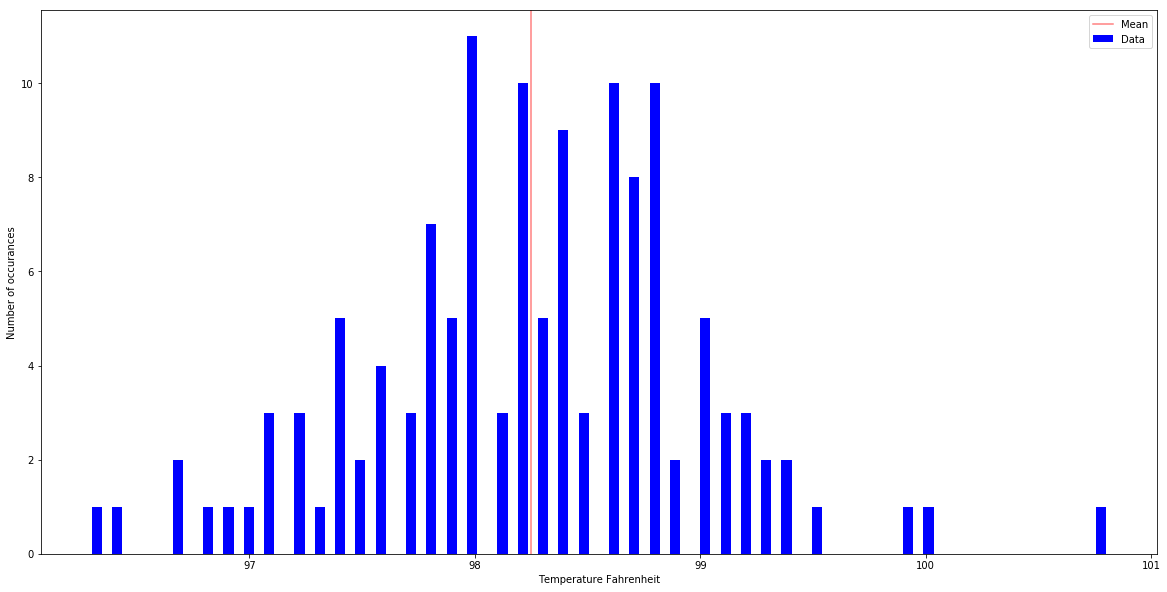

In [7]:
plt.figure(figsize=[20,10])
plt.hist(df.temperature, label='Data', color = 'blue', bins=100)
plt.axvline(np.mean(df.temperature), label = 'Mean', linestyle='-', color='red', alpha=.5)
plt.legend(loc='upper right')
plt.xlabel('Temperature Fahrenheit')
plt.ylabel('Number of occurances')
plt.show()

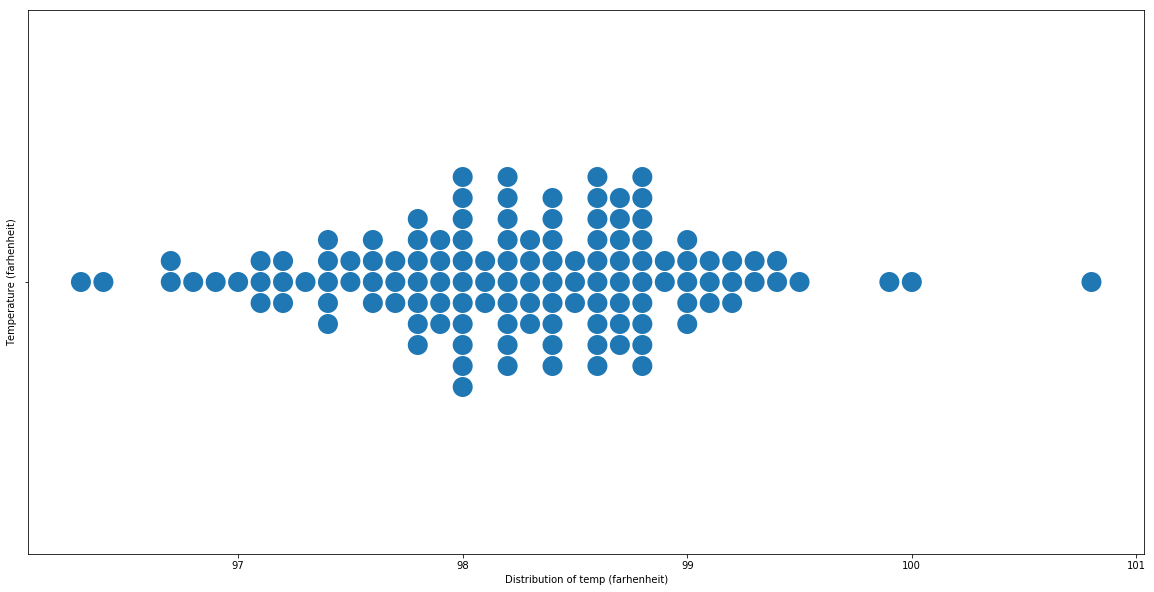

In [8]:
plt.figure(figsize=[20,10])
sns.swarmplot(x='temperature', data=df, size=20)
plt.xlabel('Distribution of temp (farhenheit)')
plt.ylabel('Temperature (farhenheit)')
plt.show()

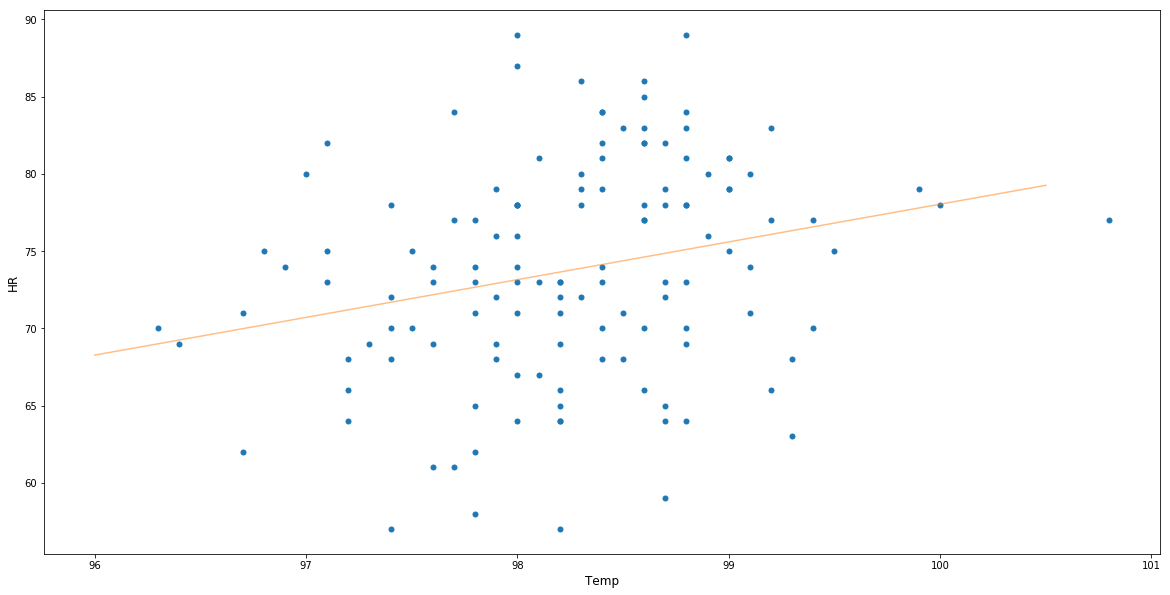

The Pearson coefficient is: 0.253656402721
slope = 2.44323803861 : Heart Rate /Temperature
intercept =  -166.284719418


In [10]:
from pearson_func import pearson_r

plt.figure(figsize=[20,10])
plt.plot(df.temperature, df.heart_rate, marker='.', label = 'H.R./Temp', linestyle='none', markersize=10)

a, b = np.polyfit(df.temperature, df.heart_rate,1)

x = np.array([96,100.5])
y = a * x + b

plt.plot(x, y, label = 'Lin. Reg. Line', alpha=.5)

plt.xlabel('Temp', fontsize='large')
plt.ylabel('HR', fontsize='large')
plt.show()

print('The Pearson coefficient is: ' + str(pearson_r(df.heart_rate, df.temperature)))
print('slope =', a, ': Heart Rate /Temperature')
print('intercept = ', b)

In [12]:
r_obs = pearson_r(df.heart_rate, df.temperature)

perm_replicates = np.empty(100000)

# Draw replicates
for i in range(len(perm_replicates)) :
    hr_permuted = np.random.permutation(df.heart_rate)
    
    perm_replicates[i] = pearson_r(hr_permuted, df.temperature)
    
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)

0.00174

In [13]:
p

0.00174

In [14]:
def ecdf(data) :
    '''Compute ECDF for a 1 d array of measurements'''
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

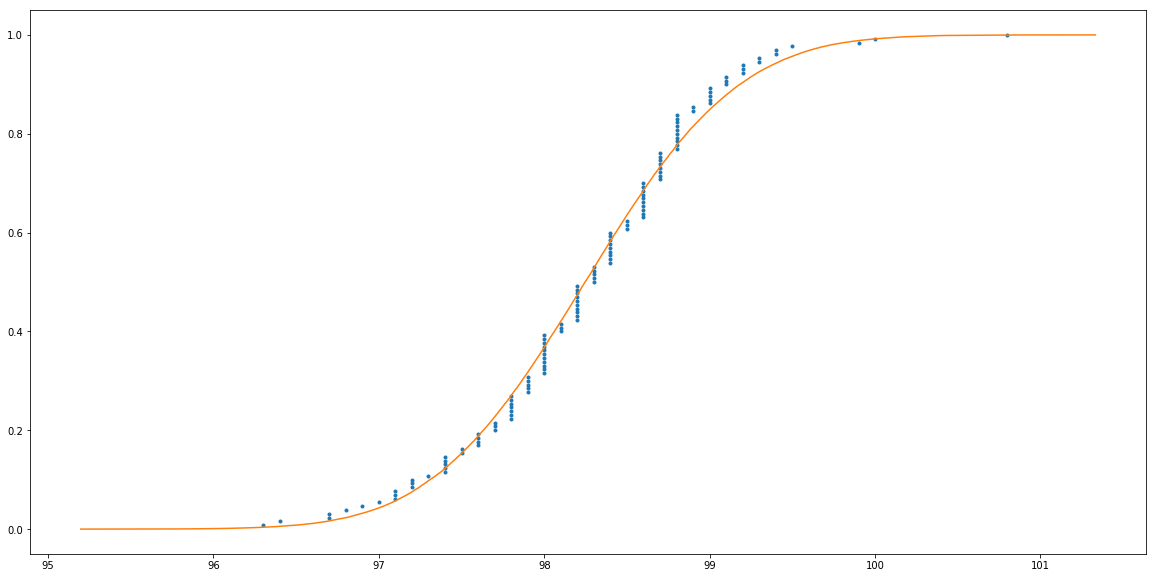

In [16]:
plt.figure(figsize=[20,10])
x_temp, y_temp = ecdf(df.temperature)
plt.plot(x_temp, y_temp, marker='.', linestyle='none')

theo_dist = np.random.normal(np.mean(df.temperature), np.std(df.temperature), size=100000)
x_theo_temp, y_theo_temp = ecdf(theo_dist)
plt.plot(x_theo_temp, y_theo_temp)

plt.show()

The mean of the data sample is 98.6

The mean of the data sample is not 98.6

p-value <= .05